## Final Project: Creation and Management of Databases
### Ana Daniela Pérez Romero / A222230117

In [8]:
# Installation of required libraries
!pip install pymysql
!pip install mysqlclient
!pip install sqlalchemy
!pip install pandas

You should consider upgrading via the 'c:\users\pana1\documents\maestria\programación\python\pcd\scripts\python.exe -m pip install --upgrade pip' command.


You should consider upgrading via the 'c:\users\pana1\documents\maestria\programación\python\pcd\scripts\python.exe -m pip install --upgrade pip' command.


You should consider upgrading via the 'c:\users\pana1\documents\maestria\programación\python\pcd\scripts\python.exe -m pip install --upgrade pip' command.


You should consider upgrading via the 'c:\users\pana1\documents\maestria\programación\python\pcd\scripts\python.exe -m pip install --upgrade pip' command.


In [11]:
import pandas as pd
from sqlalchemy import create_engine
import pymysql
import matplotlib.pyplot as plt

### Creation of dataframe in Jupyter Notebook to create a MySQL database

In [12]:
# Creation of dataframe from a .csv file
movies = pd.read_csv("top_imdb.csv")

In [13]:
# Display DataFrame
print(movies)

                  Movie_title  Released_Year  Runtime_min  \
0    The Shawshank Redemption           1994          142   
1               The Godfather           1972          175   
2             The Dark Knight           2008          152   
3      The Godfather: Part II           1974          202   
4                12 Angry Men           1957           96   
..                        ...            ...          ...   
995    Breakfast at Tiffany's           1961          115   
996                     Giant           1956          201   
997     From Here to Eternity           1953          118   
998                  Lifeboat           1944           97   
999              The 39 Steps           1935           86   

                        Genre  IMDB_Rating  \
0                       Drama          9.3   
1                Crime, Drama          9.2   
2        Action, Crime, Drama          9.0   
3                Crime, Drama          9.0   
4                Crime, Drama        

In [14]:
# We store the necessary information to access MySQL
myUser = 'root'
myPass = 'mypassword'
myEndpoint = 'localhost'
myPort = 3306
myPort2 = ':' + str(myPort) + '/'
myDb = 'movies'
myDataConnect = [myUser, myPass, myEndpoint, myPort, myDb]

In [4]:
db_data = 'mysql+mysqldb://' + myUser + ':' + myPass + '@' + myEndpoint + myPort2 \
       + myDb
engine = create_engine(db_data)

In [11]:
# Execute the to_sql for writting DF into MySQL
movies.to_sql('top_movies', engine, if_exists='replace', index=False)

1000

### Connection from MySQL database to Jupyter Notebook

In [18]:
conection=pymysql.connect(host= myEndpoint,
                     port= myPort,
                     user=myUser,
                     password= myPass,
                     db= myDb)

In [19]:
dataframe=pd.read_sql_query("SELECT * FROM movies.top_movies", conection)

dataframe.head(8)

C:\Users\PANA1\AppData\Local\Temp\ipykernel_11380\2955006213.py:1: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  dataframe=pd.read_sql_query("SELECT * FROM movies.top_movies", conection)


,Movie_title,Released_Year,Runtime_min,Genre,IMDB_Rating,Overview,Director,Star1,Star2,Star3,Star4,No_of_Votes,Gross
0,The Shawshank Redemption,1994,142,Drama,9.3,Two imprisoned men bond over a number of years...,Frank Darabont,Tim Robbins,Morgan Freeman,Bob Gunton,William Sadler,2343110,"28,341,469"
1,The Godfather,1972,175,"Crime, Drama",9.2,An organized crime dynasty's aging patriarch t...,Francis Ford Coppola,Marlon Brando,Al Pacino,James Caan,Diane Keaton,1620367,"134,966,411"
2,The Dark Knight,2008,152,"Action, Crime, Drama",9.0,When the menace known as the Joker wreaks havo...,Christopher Nolan,Christian Bale,Heath Ledger,Aaron Eckhart,Michael Caine,2303232,"534,858,444"
3,The Godfather: Part II,1974,202,"Crime, Drama",9.0,The early life and career of Vito Corleone in ...,Francis Ford Coppola,Al Pacino,Robert De Niro,Robert Duvall,Diane Keaton,1129952,"57,300,000"
4,12 Angry Men,1957,96,"Crime, Drama",9.0,A jury holdout attempts to prevent a miscarria...,Sidney Lumet,Henry Fonda,Lee J. Cobb,Martin Balsam,John Fiedler,689845,"4,360,000"
5,The Lord of the Rings: The Return of the King,2003,201,"Action, Adventure, Drama",8.9,Gandalf and Aragorn lead the World of Men agai...,Peter Jackson,Elijah Wood,Viggo Mortensen,Ian McKellen,Orlando Bloom,1642758,"377,845,905"
6,Pulp Fiction,1994,154,"Crime, Drama",8.9,"The lives of two mob hitmen, a boxer, a gangst...",Quentin Tarantino,John Travolta,Uma Thurman,Samuel L. Jackson,Bruce Willis,1826188,"107,928,762"
7,Schindler's List,1993,195,"Biography, Drama, History",8.9,"In German-occupied Poland during World War II,...",Steven Spielberg,Liam Neeson,Ralph Fiennes,Ben Kingsley,Caroline Goodall,1213505,"96,898,818"


In [20]:
query='''SELECT * FROM movies.top_movies
        WHERE 
        ((`movies`.`top_movies`.`Genre` LIKE '%Romance%')
            OR (`movies`.`top_movies`.`Genre` LIKE '%History%')
            OR (`movies`.`top_movies`.`Genre` LIKE '%Comedy%'))'''

In [21]:
dfFav=pd.read_sql_query(query, conection)
dfFav.head(8)

C:\Users\PANA1\AppData\Local\Temp\ipykernel_11380\2375001940.py:1: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  dfFav=pd.read_sql_query(query, conection)


,Movie_title,Released_Year,Runtime_min,Genre,IMDB_Rating,Overview,Director,Star1,Star2,Star3,Star4,No_of_Votes,Gross
0,Schindler's List,1993,195,"Biography, Drama, History",8.9,"In German-occupied Poland during World War II,...",Steven Spielberg,Liam Neeson,Ralph Fiennes,Ben Kingsley,Caroline Goodall,1213505,"96,898,818"
1,Forrest Gump,1994,142,"Drama, Romance",8.8,"The presidencies of Kennedy and Johnson, the e...",Robert Zemeckis,Tom Hanks,Robin Wright,Gary Sinise,Sally Field,1809221,"330,252,182"
2,Hamilton,2020,160,"Biography, Drama, History",8.6,The real life of one of America's foremost fou...,Thomas Kail,Lin-Manuel Miranda,Phillipa Soo,Leslie Odom Jr.,RenÃ©e Elise Goldsberry,55291,None
3,Gisaengchung,2019,132,"Comedy, Drama, Thriller",8.6,Greed and class discrimination threaten the ne...,Bong Joon Ho,Kang-ho Song,Lee Sun-kyun,Cho Yeo-jeong,Choi Woo-sik,552778,"53,367,844"
4,La vita Ã¨ bella,1997,116,"Comedy, Drama, Romance",8.6,When an open-minded Jewish librarian and his s...,Roberto Benigni,Roberto Benigni,Nicoletta Braschi,Giorgio Cantarini,Giustino Durano,623629,"57,598,247"
5,The Intouchables,2011,112,"Biography, Comedy, Drama",8.5,After he becomes a quadriplegic from a paragli...,Olivier Nakache,Ãric Toledano,FranÃ§ois Cluzet,Omar Sy,Anne Le Ny,760360,"13,182,281"
6,Nuovo Cinema Paradiso,1988,155,"Drama, Romance",8.5,A filmmaker recalls his childhood when falling...,Giuseppe Tornatore,Philippe Noiret,Enzo Cannavale,Antonella Attili,Isa Danieli,230763,"11,990,401"
7,Back to the Future,1985,116,"Adventure, Comedy, Sci-Fi",8.5,"Marty McFly, a 17-year-old high school student...",Robert Zemeckis,Michael J. Fox,Christopher Lloyd,Lea Thompson,Crispin Glover,1058081,"210,609,762"


### Data Analysis 

In [22]:
score_year= dataframe.groupby("Released_Year").mean()["IMDB_Rating"].reset_index()
        
score_year

C:\Users\PANA1\AppData\Local\Temp\ipykernel_11380\2037270463.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  score_year= dataframe.groupby("Released_Year").mean()["IMDB_Rating"].reset_index()


,Released_Year,IMDB_Rating
0,1920,8.100000
1,1921,8.300000
2,1922,7.900000
3,1924,8.200000
4,1925,8.100000
...,...,...
94,2016,7.935714
95,2017,7.890909
96,2018,7.994737
97,2019,7.995652


In [23]:
scoreyear_pbar = score_year.sort_values('IMDB_Rating', ascending=False).head(15)
scoreyear_pbar

,Released_Year,IMDB_Rating
14,1936,8.500000
1,1921,8.300000
35,1957,8.277778
72,1994,8.238462
20,1942,8.233333
9,1931,8.200000
3,1924,8.200000
6,1927,8.200000
32,1954,8.166667
19,1941,8.150000


<AxesSubplot: xlabel='Released_Year'>

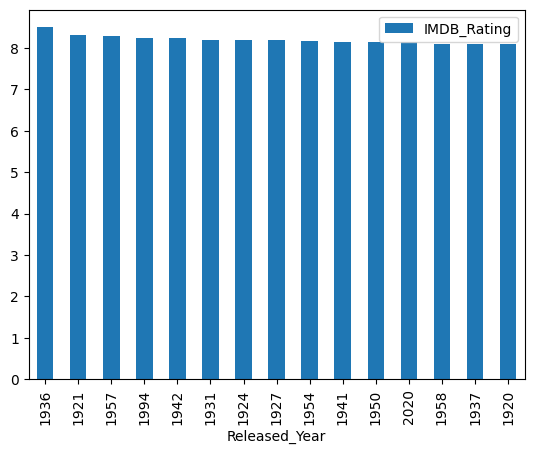

In [24]:
scoreyear_pbar.plot.bar(x="Released_Year",y="IMDB_Rating")

In [25]:
count_year= dataframe.groupby("Released_Year").count()["IMDB_Rating"].reset_index()
        
count_year

,Released_Year,IMDB_Rating
0,1920,1
1,1921,1
2,1922,1
3,1924,1
4,1925,2
...,...,...
94,2016,28
95,2017,22
96,2018,19
97,2019,23


In [26]:
scoreyear_pbar = .sort_values('IMDB_Rating', ascending=False).head(15)
count_year_pbar

,Released_Year,IMDB_Rating
92,2014,32
82,2004,31
87,2009,29
94,2016,28
91,2013,28
79,2001,27
84,2006,26
85,2007,26
93,2015,25
90,2012,24


In [27]:
count_year_pbar = dfFav.sort_values('IMDB_Rating', ascending=False).head(15)
count_year_pbar

,Movie_title,Released_Year,Runtime_min,Genre,IMDB_Rating,Overview,Director,Star1,Star2,Star3,Star4,No_of_Votes,Gross
0,Schindler's List,1993,195,"Biography, Drama, History",8.9,"In German-occupied Poland during World War II,...",Steven Spielberg,Liam Neeson,Ralph Fiennes,Ben Kingsley,Caroline Goodall,1213505,"96,898,818"
1,Forrest Gump,1994,142,"Drama, Romance",8.8,"The presidencies of Kennedy and Johnson, the e...",Robert Zemeckis,Tom Hanks,Robin Wright,Gary Sinise,Sally Field,1809221,"330,252,182"
2,Hamilton,2020,160,"Biography, Drama, History",8.6,The real life of one of America's foremost fou...,Thomas Kail,Lin-Manuel Miranda,Phillipa Soo,Leslie Odom Jr.,RenÃ©e Elise Goldsberry,55291,None
3,Gisaengchung,2019,132,"Comedy, Drama, Thriller",8.6,Greed and class discrimination threaten the ne...,Bong Joon Ho,Kang-ho Song,Lee Sun-kyun,Cho Yeo-jeong,Choi Woo-sik,552778,"53,367,844"
4,La vita Ã¨ bella,1997,116,"Comedy, Drama, Romance",8.6,When an open-minded Jewish librarian and his s...,Roberto Benigni,Roberto Benigni,Nicoletta Braschi,Giorgio Cantarini,Giustino Durano,623629,"57,598,247"
8,Casablanca,1942,102,"Drama, Romance, War",8.5,A cynical expatriate American cafe owner strug...,Michael Curtiz,Humphrey Bogart,Ingrid Bergman,Paul Henreid,Claude Rains,522093,"1,024,560"
9,Modern Times,1936,87,"Comedy, Drama, Family",8.5,The Tramp struggles to live in modern industri...,Charles Chaplin,Charles Chaplin,Paulette Goddard,Henry Bergman,Tiny Sandford,217881,"163,245"
10,City Lights,1931,87,"Comedy, Drama, Romance",8.5,"With the aid of a wealthy erratic tippler, a d...",Charles Chaplin,Charles Chaplin,Virginia Cherrill,Florence Lee,Harry Myers,167839,"19,181"
7,Back to the Future,1985,116,"Adventure, Comedy, Sci-Fi",8.5,"Marty McFly, a 17-year-old high school student...",Robert Zemeckis,Michael J. Fox,Christopher Lloyd,Lea Thompson,Crispin Glover,1058081,"210,609,762"
6,Nuovo Cinema Paradiso,1988,155,"Drama, Romance",8.5,A filmmaker recalls his childhood when falling...,Giuseppe Tornatore,Philippe Noiret,Enzo Cannavale,Antonella Attili,Isa Danieli,230763,"11,990,401"


Text(0, 0.5, 'Movie')

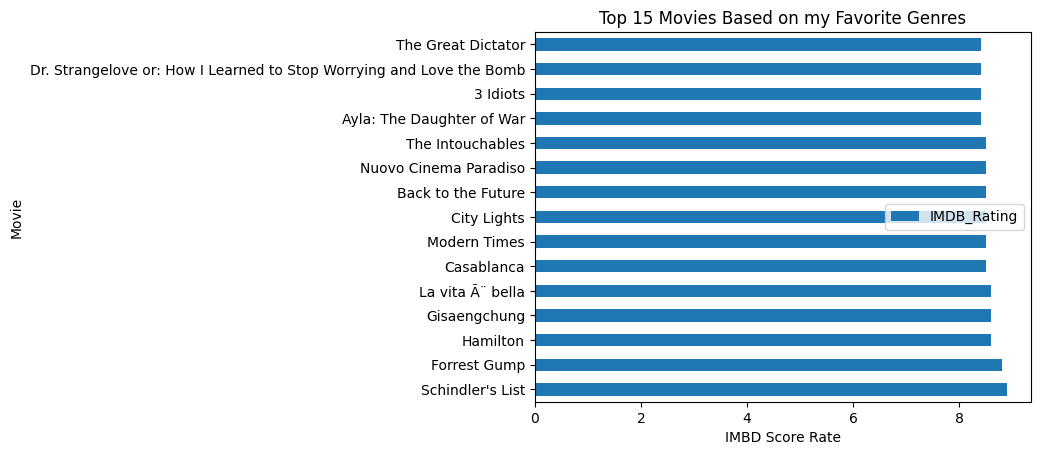

In [44]:
count_year_pbar.plot.barh(x="Movie_title",y="IMDB_Rating")
plt.title("Top 15 Movies Based on my Favorite Genres")
plt.xlabel("IMBD Score Rate")
plt.ylabel("Movie")